# Naive Bayes NLP

In [2]:
import pandas as pd
import sklearn as sklearn

In [3]:
 os.path.join("hatespeech_data", "tweets_train.csv")

'hatespeech_data/tweets_train.csv'

In [5]:
import os

df=pd.read_csv(
     os.path.join('hatespeech_data', 'tweets_train.csv'),index_col=0
)

In [6]:
df.columns

Index(['tweet_id', 'author_id', 'conversation_id', 'text', 'Odio', 'Mujeres',
       'Comunidad LGBTQ+', 'Comunidades Migrantes', 'Pueblos Originarios'],
      dtype='object')

In [7]:
df['Odio'].value_counts()

0    954
3    622
2    377
1    303
Name: Odio, dtype: int64

In [8]:
df['Odio']=df['Odio'].astype('category')
df['Mujeres']=df['Mujeres'].astype('category')
df['Comunidad LGBTQ+']=df['Comunidad LGBTQ+'].astype('category')
df['Comunidades Migrantes']=df['Comunidades Migrantes'].astype('category')
df['Pueblos Originarios']=df['Pueblos Originarios'].astype('category')

In [9]:
df['tweet_id']=df['tweet_id'].astype('category')
df['author_id']=df['author_id'].astype('category')

Al contar los datos pertencientes a cada clase, se observa desbalance de clases.

In [17]:
df.groupby('author_id').count()['tweet_id'].max()

6

In [18]:
df.groupby('author_id').count()['tweet_id'].min()

1

In [19]:
df.loc[0]['text']

'En una amistad o soy tipo: \r\nLo peor es que siempre es así lskdkdnff https://t.co/813bPNQZqR'

In [20]:
df.loc[0]['Odio']

0

In [21]:
df.loc[500]['text']

'Enamorado de esta mujer https://t.co/wDv23bbcWG'

In [22]:
df.loc[500]['Mujeres']

2

In [24]:
df_tweets=pd.read_csv(
     os.path.join('hatespeech_data', 'referenced_tweets_data.csv'),index_col=0
)

In [25]:
df_tweets['tweet_id']=df_tweets['tweet_id'].astype('category')

In [27]:
df_new=df.merge(df_tweets, how='right', on='tweet_id')

In [48]:
t_id=df.tweet_id.iloc[2]

In [49]:
df_tweets[df_tweets.tweet_id==t_id]

,tweet_id,author_id,conversation_id,text


In [50]:
df[df.tweet_id==t_id]

,tweet_id,author_id,conversation_id,text,Odio,Mujeres,Comunidad LGBTQ+,Comunidades Migrantes,Pueblos Originarios
2,1079889645280944129,2328230546,(),menos mal q se recibe el año con ropa blanca j...,0,0,0,0,0


Juntamos los dos campos de texto 'PETICION_CIUDADANO' y 'DESCRIPCION_CIUDADANO'

In [55]:
df['text']

0       En una amistad o soy tipo: \r\nLo peor es que ...
1       QUIEN FUE LA MARACA CULIA TE VOY A MATAR PERRA...
2       menos mal q se recibe el año con ropa blanca j...
3       Cuantos INFILTRADOS extranjeros hay ahi😡 https...
4       #ENCONTRADO #GUAYAQUIL\r\nFecha: 06/06/22\r\nS...
                              ...                        
2251    Todo me queda para el orto la puta madre que l...
2252    @DnAkd2947 @AmarasLaPatria Miserable e hijo de...
2253           @Misael25603414 @sanbenito Cállate mejor 🥰
2254    @ServicioTelcel 12 msj hoy y 12 mentadas de ma...
2255    @CNNChile @tv_monica MIRE señor; yo soy un sim...
Name: text, Length: 2256, dtype: object

In [56]:
import string, re

def remove_punct(x):
    comp = re.compile("[%s\d]" % re.escape(string.punctuation))
    return " ".join(comp.sub(" ", str(x)).split()).lower()

df['data']=df['text'].apply(remove_punct)

In [58]:
df['data']=df['data'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [59]:
df['data'][-20:]

2236    daritapi tigosportspy paraguayo que juega en e...
2237                     capitanbitcoin malditos salvajes
2238    ingrodolfohdez petrogustavo no pago el rescate...
2239    solo un viejo verde te puede gritar linda a vo...
2240    lorraine frj alittlestormm ustedes me dan pena...
2241    pablosoooo ni tanto ni tan calvo una especie d...
2242    sol yluna vickydavilah ahi tiene a su corrupto...
2243    crystalbbabe eri terrible wna pendeja kl webea...
2244    maka de chile pandachileno carabdechile difund...
2245    los extranjeros en chile reclamando porque no ...
2246     nuevo articulolgbt  llaveros del orgullo lgbt...
2247        dantepiang y sale arrancando el amariconao ql
2248    unoticias si la onu ama a los extranjeros que ...
2249    nolohagasfiliz te lo mereces filiz por pensar ...
2250    profmarcoavila isabelamor iracihassler que nec...
2251    todo me queda para el orto la puta madre que l...
2252        dnakd amaraslapatria miserable e hijo de puta
2253          

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

n_documents = df.shape[0]
count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
train_binary_bag_of_words = count_vectorizer.fit_transform(df['data']).todense() 


In [94]:
df_test=pd.read_csv(
     os.path.join('hatespeech_data', 'public_test_data.csv'),index_col=0
)

In [97]:
df_test['data']=df_test['text'].apply(remove_punct)
df_test['data']=df_test['data'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [98]:
X_sub=count_vectorizer.transform(df_test['data'])

In [69]:
train_binary_bag_of_words.shape

(2256, 3486)

In [70]:
df['data'][0]

'en una amistad o soy tipo lo peor es que siempre es asi lskdkdnff https t co bpnqzqr'

In [71]:
df['Odio'][0]

0

In [72]:
labels=(df['Odio']!=0).astype(int)

In [73]:
labels.shape

(2256,)

# Bernoulli Naive Bayes

C.D. Manning, P. Raghavan and H. Schuetze (2008). Introduction to Information Retrieval. Cambridge University Press, pp. 234-265. https://nlp.stanford.edu/IR-book/html/htmledition/the-bernoulli-model-1.html

A. McCallum and K. Nigam (1998). A comparison of event models for naive Bayes text classification. Proc. AAAI/ICML-98 Workshop on Learning for Text Categorization, pp. 41-48.

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_binary_bag_of_words, labels,test_size=0.2)

In [75]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import numpy as np


for a in np.linspace(1.0e-3,1,10):
    clf = BernoulliNB(alpha=a)
    clf.fit(np.asarray(X_train), np.asarray(y_train))
    y_pred = clf.predict(np.asarray(X_test))
    score = metrics.accuracy_score(y_test.values, y_pred)
    print('alpha : {0:0.2f}, accuracy: {1:0.2f}'.format(a,score))

alpha : 0.00, accuracy: 0.74
alpha : 0.11, accuracy: 0.75
alpha : 0.22, accuracy: 0.75
alpha : 0.33, accuracy: 0.75
alpha : 0.45, accuracy: 0.76
alpha : 0.56, accuracy: 0.76
alpha : 0.67, accuracy: 0.76
alpha : 0.78, accuracy: 0.77
alpha : 0.89, accuracy: 0.76
alpha : 1.00, accuracy: 0.76


In [76]:
type(np.asarray(X_train))

numpy.ndarray

In [92]:
from sklearn.metrics import classification_report

clf = BernoulliNB(alpha=0.78)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       190
           1       0.85      0.72      0.78       262

    accuracy                           0.77       452
   macro avg       0.77      0.77      0.76       452
weighted avg       0.78      0.77      0.77       452



In [101]:
y_sub=clf.predict(X_sub)

In [104]:
df_test['text'][0],y_sub[0]

('Estoy de acuerdo que corrijas a tus hijos pero no tratarlos como “Par de hijos de puta”',
 0)

In [105]:
df_test['text'][1],y_sub[1]

('@danieljadue @ArquitectsPC1 Te regalo un pico pa que lleguis de poto, wn hueco.',
 1)

# Bayesian Naive Bayes

Ahora, en vez de considerar distribuciones de Bernoulli, utilizamos distribuciones conjugadas (Beta)

In [78]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.keras as keras
tfd = tfp.distributions

def get_prior(y):
    probs=[np.sum(y==c_k)/len(y) for c_k in np.unique(y)]
    print('The class priors are {}'.format(np.sum(probs)))
    priors=tfd.Categorical(probs=probs)
    return priors

In [79]:
prior=get_prior(labels)

The class priors are 1.0


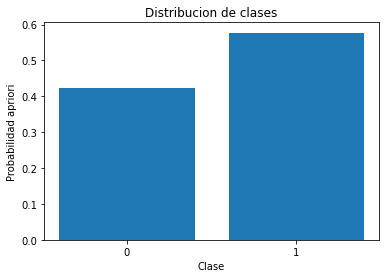

In [85]:
import matplotlib.pyplot as plt

str_labels=labels.unique()

unique_labels=np.unique(labels)
plt.bar(range(2), prior.probs.numpy())
plt.xlabel("Clase")
plt.ylabel("Probabilidad apriori")
plt.title("Distribucion de clases")
plt.xticks(range(2), str_labels)
plt.show()

Los datos originales de las imagenes contienen regiones donde siempre los valores son cero. Una forma de suavizar la estimacion de probabilidades condicionales es usar suavizado de Laplace (https://en.wikipedia.org/wiki/Additive_smoothing)

In [86]:
def laplace_smoothing(binary_data,labels,alpha=1):
    n_words=binary_data.shape[1]
    n_classes=len(np.unique(labels))
    theta = np.zeros([n_classes, n_words])
    for c_k in range(n_classes):
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of pixels in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)
    return theta

$p(\theta | D) \propto p(\theta)p(D | \theta)$

$p(\theta | a, b) = \frac{\theta^{a - 1}(1 - \theta)^{\beta - 1}}{\beta(a,b)}$

El estimador de maxima verosimilitud para la distrbucion Beta es:

$\hat{\theta}_{\text{map}} = \frac{\alpha + n_1 - 1}{\alpha + \beta + n_1 + n_2 - 2}$

In [88]:
def get_class_conditionals(probs):
    class_conditionals=tfd.Bernoulli(probs=probs)
    return class_conditionals

def predict_sample(prior, class_conditionals, sample):
    cond_probs = class_conditionals.log_prob(sample)
    prior_probs=prior.logits_parameter()
    cond_probs=tf.cast(cond_probs,prior_probs.dtype)
    joint_likelihood = tf.add(prior_probs, tf.reduce_sum(cond_probs,axis=1))
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor
    return tf.math.exp(log_prob).numpy()

def predict_class(prior, class_conditionals, x):
    pred=[]
    for sample in x:
        prob=predict_sample(prior, class_conditionals,sample)
        pred.append(prob.argmax())
    return pred


In [89]:
prior.dtype

tf.int32

In [90]:
for a in np.linspace(0,1,10):
    theta=laplace_smoothing(X_train,y_train,alpha=a)
    class_conditionals=get_class_conditionals(theta)
    y_pred_tfp=predict_class(prior, class_conditionals, X_test)
    score = metrics.accuracy_score(y_test, y_pred_tfp)
    print('alpha : {0:0.2f}, accuracy: {1:0.2f}'.format(a,score))

alpha : 0.00, accuracy: 0.62
alpha : 0.11, accuracy: 0.75
alpha : 0.22, accuracy: 0.75
alpha : 0.33, accuracy: 0.75
alpha : 0.44, accuracy: 0.76
alpha : 0.56, accuracy: 0.76
alpha : 0.67, accuracy: 0.76
alpha : 0.78, accuracy: 0.77
alpha : 0.89, accuracy: 0.76
alpha : 1.00, accuracy: 0.76


In [91]:
from sklearn.metrics import classification_report

theta=laplace_smoothing(X_train,y_train,alpha=0.33)
class_conditionals=get_class_conditionals(theta)
y_pred_tfp=predict_class(prior, class_conditionals, X_test)
print(classification_report(y_test, y_pred_tfp))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       190
           1       0.83      0.72      0.77       262

    accuracy                           0.75       452
   macro avg       0.75      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452

